In [1]:
!pip install yfinance numpy pandas matplotlib scikit-learn tensorflow

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0863 - val_loss: 0.0249
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0025 - val_loss: 0.0065
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 9.1374e-04 - val_loss: 0.0010
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.3446e-04 - val_loss: 8.8411e-04
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.3979e-04 - val_loss: 7.9988e-04
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.1833e-04 - val_loss: 8.0454e-04
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.3342e-04 - val_loss: 7.6904e-04
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 6.1216e-04 - val_loss: 7.6723e-04
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.7840e-04 - val_loss: 7.6308e-04
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.4243e-04 - val_loss: 7.0855e-04
Epo

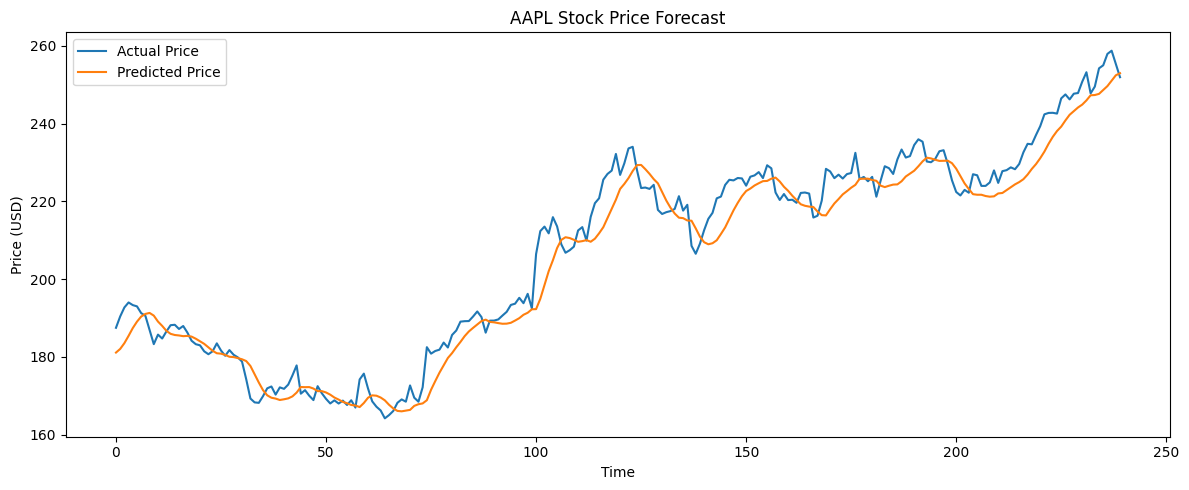

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Parameters
ticker = 'AAPL'  # You can change this to any stock symbol
start_date = '2020-01-01'
end_date = '2024-12-31'
window_size = 60
epochs = 30
batch_size = 32

# 1. Fetch data from Yahoo Finance
df = yf.download(ticker, start=start_date, end=end_date)
data = df['Close'].values.reshape(-1, 1)

# 2. Normalize and prepare sequences
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, window_size)

# 3. Split into training and test sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# 4. Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 5. Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=epochs, batch_size=batch_size, verbose=1)

# 6. Predict and inverse transform
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test)

# 7. Plot results
plt.figure(figsize=(12, 5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title(f"{ticker} Stock Price Forecast")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()
